<center>
    <h1> 
        Teste de Hipótese 1.8: Visualização dos Histogramas das Matizes Equalizadas e Média Móvel
    </h1>
</center>
    <div style="text-align: right;"><h3>
        Carlos Eduardo Cassimiro da Silva
    </h3></div>

<p>No teste 1.7 foi possível verificar que a matiz(hue), assim como a saturação e o "valor" no padrão HSV não demonstraram histogramas tão distinguíveis entre os tipos de documentos, somente a matiz que demonstrou pequena diferença. Nesses notebook iremos verificar se é possível melhorar a distinção da matiz das amostras através de equalização.</p>
<p>Ainda também, com o objetivo de tentar visualizar melhor as diferenças, iremos tentar aplicar a média móvel nos histogramas. A média móvel é utilizada para diminuir os ruídos e suavizar sinais continuos, entretanto, podemos utilizá-la no histograma para diminuir os picos de valores e visualizar melhor a forma deles.</p>

<h4>Desafio #1: Classificação de documentos (RG, CNH e CPF) </h4>

 - Contextualização: Inúmeras áreas de diferentes organizações (usualmente como parte de um processo de um backoffice) recepcionam documentos dos seus clientes para formação de kits de documentação. Tais kits são, por exemplo, compartilhados com outros stakeholders das empresas. Conforme pode-se pressupor, um desafio nesse cenário refere-se ao fato de que o cliente pode enviar documentos, porém sem necessariamente indicar a qual tipo se o documento se refere (RG, CNH ou CPF, por exemplo). Dessa forma, ao invés de demandar um trabalho manual para essa leitura e classificação dos documentos, podemos construir um modelo de aprendizado que tenha capacidade de ler um conjunto de documentos (em .jpg, por exemplo) e, subsequentemente, realizar a classificação em três tipos distintos: RG, CNH e CPF.
 - Dataset: Para esse desafio utilizaremos um dataset público de RG, CNH e CPF (incluindo as imagens). Este repositório apresenta o conjunto de dados denominado Brazilian Identity Document Dataset (BID Dataset), o primeiro conjunto de dados público de documentos de identificação brasileiros. <br>
Link do dataset: https://github.com/ricardobnjunior/Brazilian-Identity-Document-Dataset

<h4>Roteiro</h4>
Módulos utilizados <br>
1. Comparação das médias dos histogramas dos documentos <br>
2. Calculando a média da matiz(hue) das amostras apartir do formato HSV  <br>
3. Conclusão

##### Módulos utilizados

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
plt.style.use('ggplot')

# 1. Comparação das médias dos histogramas das matizes(hue) dos documentos

In [24]:
# Lista de nomes para facilitar o acesso as pastas e aos arquivos
documentos = ['cpf_frente','cpf_tras','rg_frente','rg_tras','cnh_frente','cnh_tras']

In [25]:
# Laço para repetir o processos anteriores de um vez para todos as amostras boas
medias = {}    # Dicionário para guardar todos as amostras dos documentos e as médias dos histogramas
docs_bons = [] # Lista para salvar as imagens para utiliza-las mais na frente
for k in documentos:    # Laço iterando sobre a lista de nomes
    doc = []            # Lista para salvar os documentos
    for i in range(0,20):   # Laço para normalizar todos os histogramas do referido documento da vez
        hist = []     # Lista para salvar os histogramas
        # Abre e converte o sistema de cores para RGB
        doc.append(cv2.cvtColor(cv2.imread('amostras_boas/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2HSV))
        docs_bons.append(doc[i])
        
        hist.append(cv2.calcHist(doc[i],[0],None,[256],[0,256]))  # Processo análogo ao anterior para 
        hist.append(cv2.calcHist(doc[i],[1],None,[256],[0,256]))  # cálcular as média dos histogramas
        hist.append(cv2.calcHist(doc[i],[2],None,[256],[0,256]))
        for j in range(0,3):
            mm = MinMaxScaler()
            hist[j] = mm.fit_transform(hist[j], hist[j])
        doc[i] = hist

    # Média dos histogramas
    sum_hue = 0
    sum_sat = 0
    sum_val = 0
    
    for i in range(len(doc)):
        sum_hue += doc[i][0]
        sum_sat += doc[i][1]
        sum_val += doc[i][2]
        
    sum_hue = sum_hue/len(doc)
    sum_sat = sum_sat/len(doc)
    sum_val = sum_val/len(doc)
    
    # Salva o resultado em um dicionário para facilitar nas plotagens
    medias[k] = {'matrix': cv2.cvtColor(cv2.imread('amostras_boas/'+k+'/'+k+' ('+str(1)+').jpg'), cv2.COLOR_BGR2RGB),
                 'hist':[sum_hue, sum_sat, sum_val]}

In [26]:
# Laço para repetir o processos anteriores de um vez para todas as amostras ruins
medias2 = {}    # Dicionário para guardar todos as amostras dos documentos e as médias dos histogramas
docs_ruins = [] # Lista para salvar as imagens para utiliza-las mais na frente
for k in documentos:    # Laço iterando sobre a lista de nomes
    doc = []            # Lista para salvar os documentos
    for i in range(0,7):   # Laço para normalizar todos os histogramas do referido documento da vez
        hist = []     # Lista para salvar os histogramas
        # Abre e converte o sistema de cores para RGB
        doc.append(cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2HSV))
        docs_ruins.append(doc[i])
         
        hist.append(cv2.calcHist(doc[i],[0],None,[256],[0,256]))  # Processo análogo ao anterior para 
        hist.append(cv2.calcHist(doc[i],[1],None,[256],[0,256]))  # cálcular as média dos histogramas
        hist.append(cv2.calcHist(doc[i],[2],None,[256],[0,256]))
        for j in range(0,3):
            mm = MinMaxScaler()
            hist[j] = mm.fit_transform(hist[j], hist[j])
        doc[i] = hist

    # Média dos histogramas
    sum_hue = 0
    sum_sat = 0
    sum_val = 0
    
    for i in range(len(doc)):
        sum_hue += doc[i][0]
        sum_sat += doc[i][1]
        sum_val += doc[i][2]
        
    sum_hue = sum_hue/len(doc)
    sum_sat = sum_sat/len(doc)
    sum_val = sum_val/len(doc)
    
    # Salva o resultado em um dicionário para facilitar nas plotagens
    medias2[k] = {'matrix': cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(1)+').jpg'), cv2.COLOR_BGR2RGB),
                 'hist':[sum_hue, sum_sat, sum_val]}

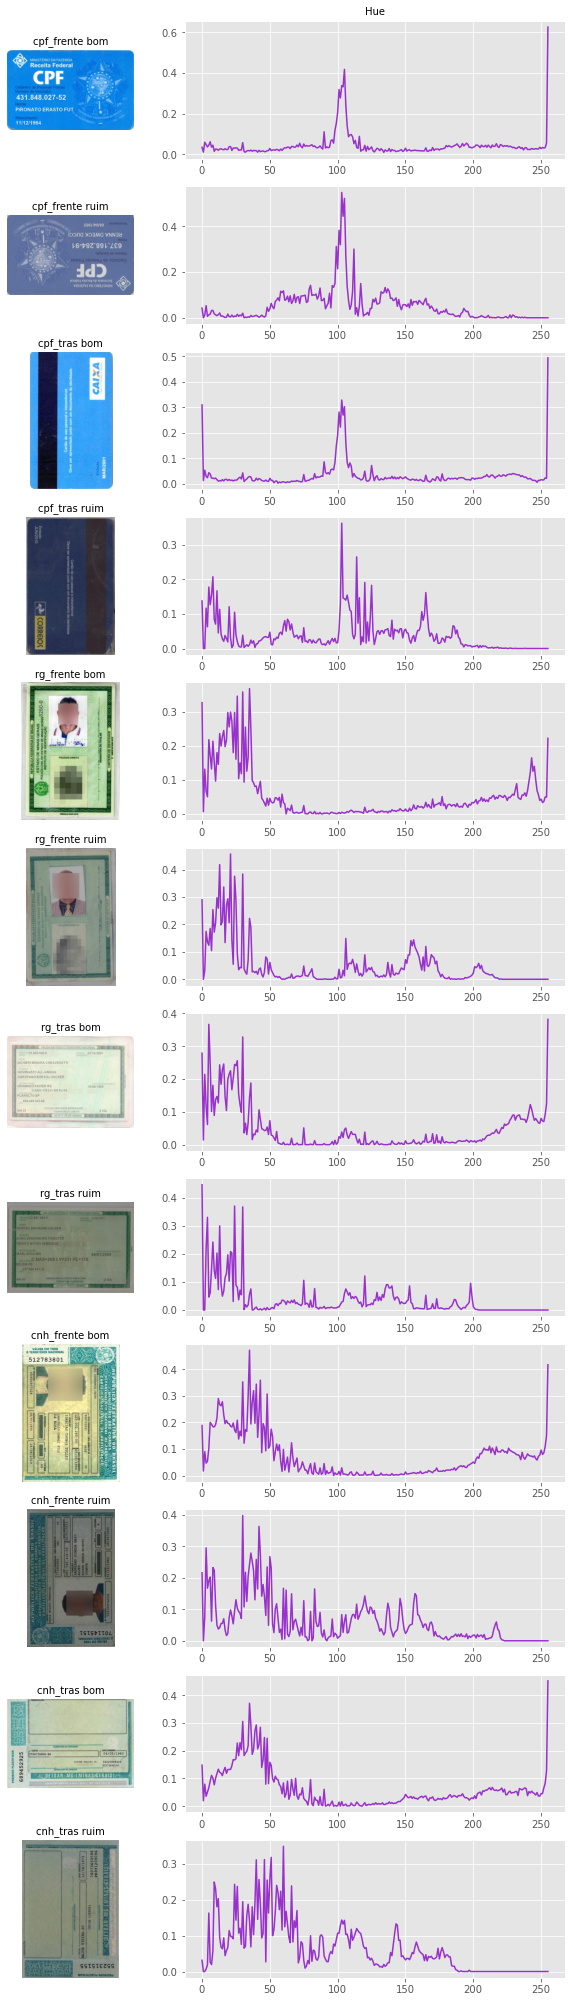

In [31]:
n = len(medias.keys()) + len(medias2.keys()) # Difinindo o número de linhas
fig , ax = plt.subplots(n, 2, figsize=(10,3*n), gridspec_kw={'width_ratios': [1,3]}) # Criando a "estura" do subplots

ax.flatten()
ax = ax.T.flatten()
for i,doc in zip(range(0,n,2),documentos):
    ax[0+(i)].imshow(medias[doc]['matrix']); # plotando a imagem boa para ilustrar o documento
    ax[0+(i)].axis('off'); ax[0+(i)].set_title(doc + ' bom',fontsize=10) 

    ax[n+(i)].plot(medias[doc]['hist'][0], color='darkorchid') # plotando o histograma
    if i == 0 : ax[n+(i)].set_title('Hue',fontsize=10) # coloca o nome no primeiro histograma
        
    ax[0+(i+1)].imshow(medias2[doc]['matrix']); # plotando a imagem ruim para ilustrar o documento
    ax[0+(i+1)].axis('off'); ax[0+(i+1)].set_title(doc + ' ruim',fontsize=10)

    ax[n+(i+1)].plot(medias2[doc]['hist'][0], color='darkorchid') # plotando o histograma

plt.show();

# Por alguma razão, quanto maior é a platagem mais distante fica o título da imagem, 
# e dessa vez a titulo ficou muito distante, então resolvi tirar

Como podemos ver, alguns histogramas até apresentam algumas pequenas diferenças, como no rg e na cnh, mas os picos atrapalham a visualização, e consequentemente atrapalharinham na avaliação de algum modendo.

# 2. Aplicando a equalização CLAHE na matiz

In [32]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # Grid mais brusco
clahe2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(20,20)) # Grid mais suave

# Laço para repetir o processos anteriores de um vez para todas as amostras ruins
medias3 = {}    # Dicionário para guardar todos as amostras dos documentos e as médias dos histogramas
for k in documentos:    # Laço iterando sobre a lista de nomes
    doc = []            # Lista para salvar os documentos
    for i in range(0,7):   # Laço para normalizar todos os histogramas do referido documento da vez
        hist = []     # Lista para salvar os histogramas
        # Abre e converte o sistema de cores para HSV
        doc.append(cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2HSV))
         
        hist.append(cv2.calcHist(doc[i],[0],None,[256],[0,256]))  # Processo análogo ao anterior para 
        hist.append(cv2.calcHist(doc[i],[1],None,[256],[0,256]))  # cálcular as média dos histogramas
        hist.append(cv2.calcHist(doc[i],[2],None,[256],[0,256]))
        
        # Dessa vez, aplicamos primeiro a equalização para depois tirarmos a média
        H, S, V =  cv2.split(docs_ruins[i])
        hist.append(clahe2.apply(H))
        hist.append(clahe.apply(H))
        hist.append(clahe.apply((H*1.3).astype('uint8')))
        
        
        for j in range(0,3):
            mm = MinMaxScaler()
            hist[j] = mm.fit_transform(hist[j], hist[j])
        doc[i] = hist

    # Média dos histogramas
    sum_hue = 0
    sum_sat = 0
    sum_val = 0
    
    for i in range(len(doc)):
        sum_hue += doc[i][0]
        sum_sat += doc[i][1]
        sum_val += doc[i][2]
        
    sum_hue = sum_hue/len(doc)
    sum_sat = sum_sat/len(doc)
    sum_val = sum_val/len(doc)
    
    # Salva o resultado em um dicionário para facilitar nas plotagens
    medias3[k] = {'matrix': cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(1)+').jpg'), cv2.COLOR_BGR2RGB),
                 'hist':[sum_hue, sum_sat, sum_val]}

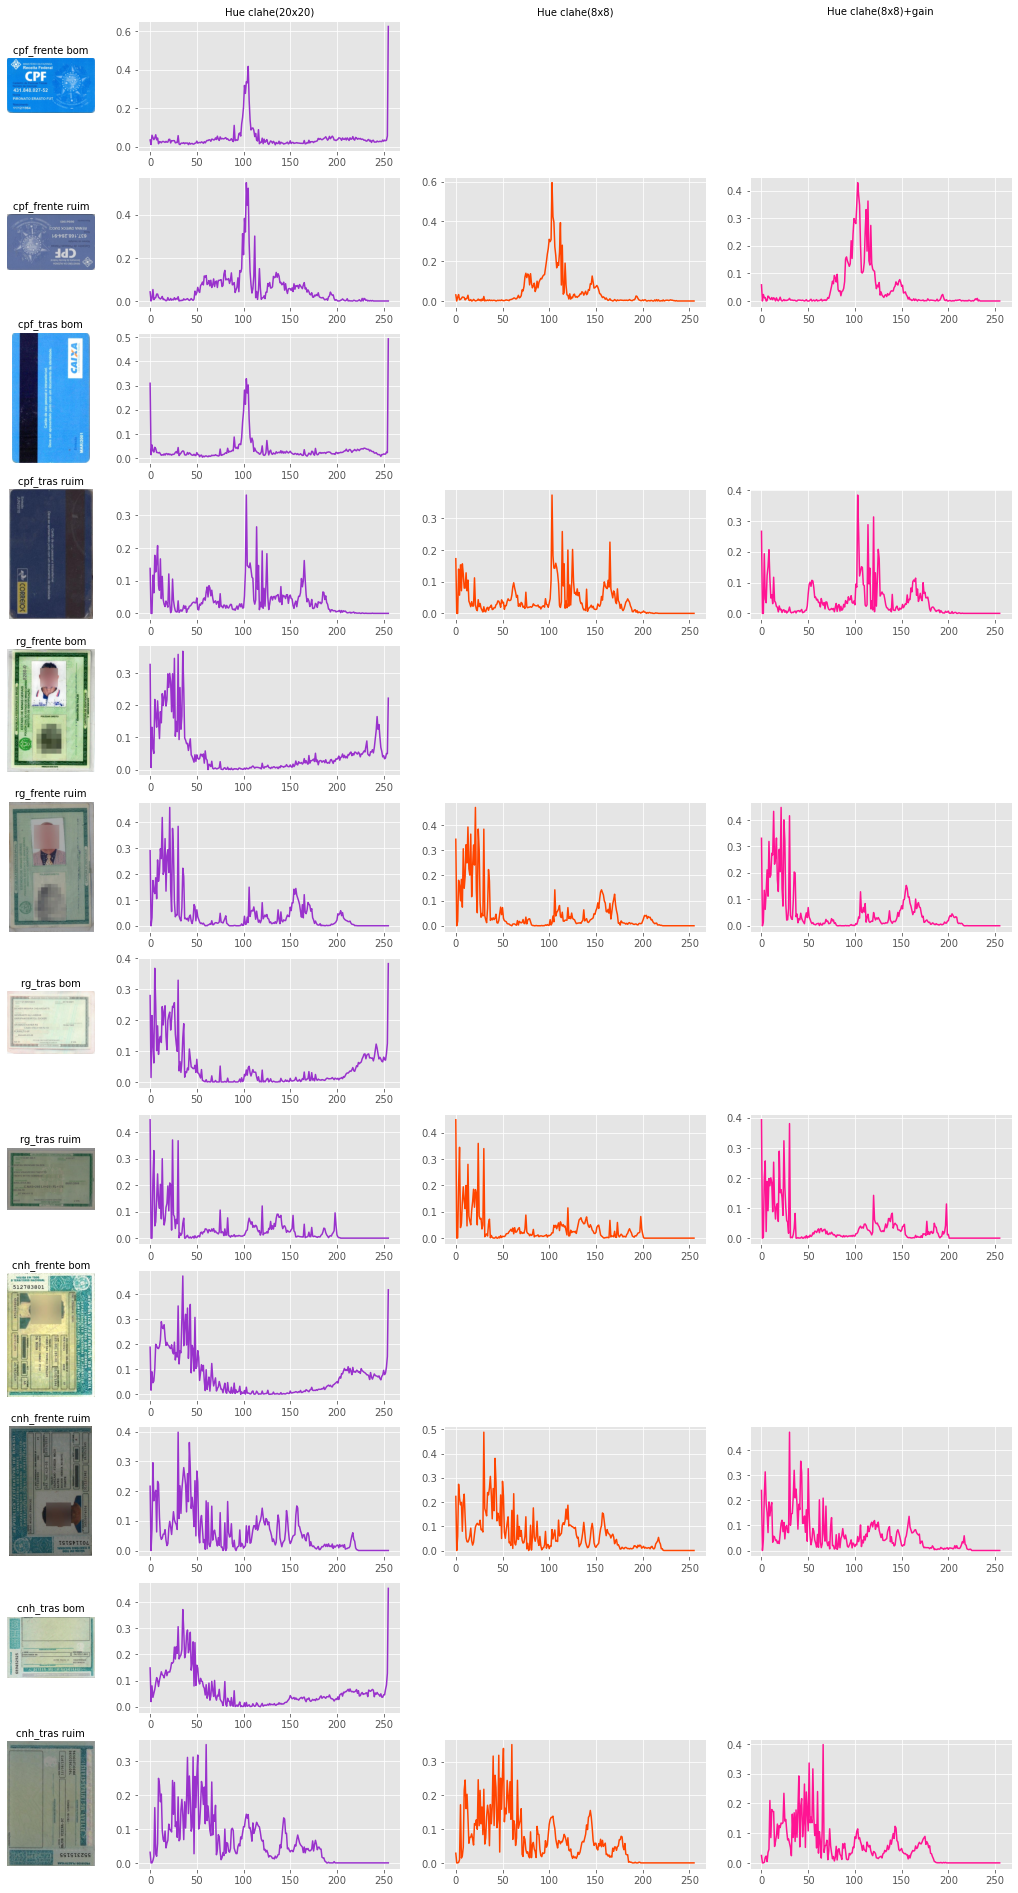

In [43]:
# Plot análogo ao anterior
n = len(medias.keys()) + len(medias2.keys())
fig , ax = plt.subplots(n, 4, figsize=(18,3*n-2), gridspec_kw={'width_ratios': [1,3,3,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()
for i,doc in zip(range(0,n,2),documentos):
    ax[0+(i)].imshow(medias[doc]['matrix']); 
    ax[0+(i)].axis('off'); ax[0+(i)].set_title(doc + ' bom',fontsize=10)

    
    ax[n+(i)].plot(medias[doc]['hist'][0], color='darkorchid')
    ax[n*2+(i)].plot(' '); ax[n*2+(i)].axis('off')
    ax[n*3+(i)].plot(' '); ax[n*3+(i)].axis('off')
    if(i == 0): 
        ax[n+(i)].set_title('Hue clahe(20x20)',fontsize=10)
        ax[n*2+(i)].set_title('Hue clahe(8x8)',fontsize=10)
        ax[n*3+(i)].set_title('Hue clahe(8x8)+gain',fontsize=10)
        
    ax[0+(i+1)].imshow(medias3[doc]['matrix']); 
    ax[0+(i+1)].axis('off'); ax[0+(i+1)].set_title(doc + ' ruim',fontsize=10)

    ax[n+(i+1)].plot(medias3[doc]['hist'][0], color='darkorchid');
    ax[n*2+(i+1)].plot(medias3[doc]['hist'][1], color='orangered')
    ax[n*3+(i+1)].plot(medias3[doc]['hist'][2], color='deeppink')

Foi possível ver que a equalização clahe e até mesmo a equalização clahe + ganho não melhoraram a distinção entre as matizes dos difentes documentos.

# 3. Suavizando a forma do histograma com média móvel

In [105]:
def media_movel(doc_type, n):
    global medias
    medias_suavizada = []
    tam = len(medias[doc_type]['hist'][0])

    for i in range(tam-n):
        soma = 0
        for j in range(n):
            soma += medias[doc_type]['hist'][0][i+j][0]
        medias_suavizada.append(soma/n)
        
    for i in range(n,tam-n,-1):
        soma = 0
        for j in range(n):
            soma += medias[doc_type]['hist'][0][i-j][0]
        medias_suavizada.append(soma/n)
    
    return medias_suavizada

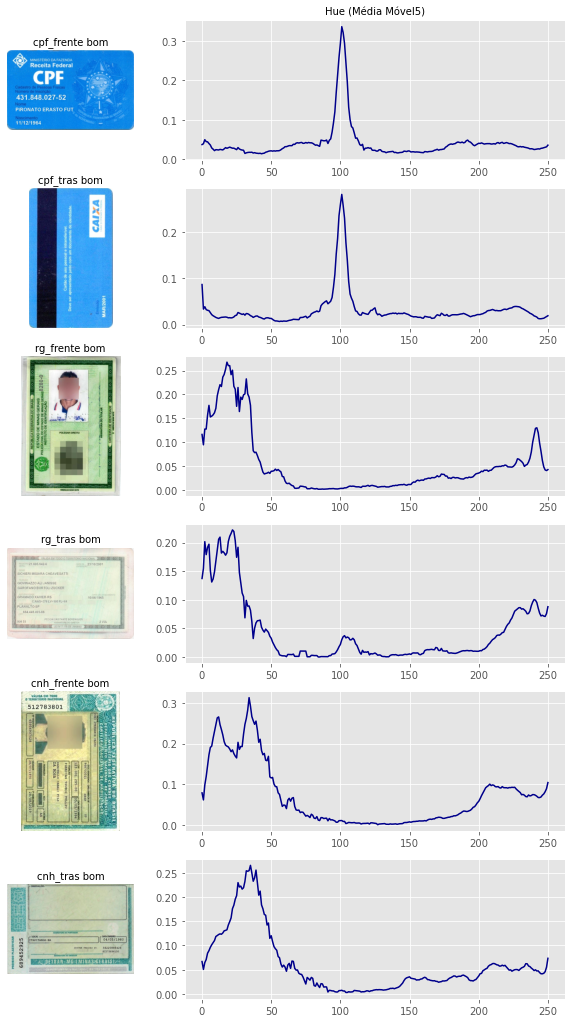

In [113]:
# Plot análogo ao anterior
n = len(medias.keys())
k=5

fig , ax = plt.subplots(n, 2, figsize=(10,3*n), gridspec_kw={'width_ratios': [1,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()
for i,doc in zip(range(0,n),documentos):
    ax[0+(i)].imshow(medias[doc]['matrix']); 
    ax[0+(i)].axis('off'); ax[0+(i)].set_title(doc + ' bom',fontsize=10)

    ax[n+(i)].plot(media_movel(doc,k), color='darkblue')
    if i == 0 : ax[n+(i)].set_title('Hue (Média Móvel '+str(k)+')',fontsize=10)

plt.show()

Podemos ver que a sualização dos histogramas o tornaram mais fácil de serem avaliados.

# 3. Conclusão

Nesse teste vimos que aplicar a equalização clahe no histograma da matiz não funciona muito bem para melhorar a distinção do mesmo entre os outros documentos. Entretanto, foi possível ver que ao aplicarmos a média móvel nos valores dos histogramas, conseguimos suavizar a sua forma e avaliar melhor as diferenças. Antes era possível identificar que havia uma certa diferença entre o histograma da matiz da cnh e do rg pouco sútil, mas com a suavização podemos ver melhor essa diferença. Acredito que submetendo esses valores suavizados em algum modelo, o mesmo poderá "interpretá-lo" melhor<br>